## Explore metadata for a curated collection

This notebook shows how to connect to a curated TDM dataset and explore the metadata.

In [1]:
import pandas as pd

from tdm_core.client import Dataset

Initialize a TDM dataset object with the dataset ID provided in the email you received after curating your dataset in the Digital Scholars Workbench.

In [2]:
dset = Dataset('bb3d938b-bc61-4c2c-a21c-9a4f102035c8')

Find total number of documents in the dataset. 

In [3]:
len(dset)

61

After initializing the `Dataset`, the documents in the dataset are downloaded in the background.

A list of all of the items in the Dataset is available.

In [88]:
dset.items[:5]

['http://hdl.handle.net/2027/uc1.b4880650',
 'http://hdl.handle.net/2027/mdp.39076006733898',
 'http://hdl.handle.net/2027/uc1.32106002083555',
 'http://hdl.handle.net/2027/uva.x000926626',
 'http://hdl.handle.net/2027/nyp.33433082396866']

An individual document can be downloaded by calling the `.get` method.

In [141]:
doc = dset.get(dset.items[50])

Iterate through the metdata and caputure title and publication date.

In [161]:
rows = []
for d in docs:
    if d == {}:
        continue
    meta = d.get('metadata')
    if meta is None:
        continue
    if isinstance(meta, list):
        meta = [m for m in meta if m['@type'] == 'PublicationIssue'][0]
    yr = meta.get('pubDate') or meta['datePublished']['@value'][:4]
    decade = int(str(yr)[0:3] + '0')
    title = meta.get('title') or meta.get('name')
    pages = d['features']['pageCount']
    rows.append([
        meta.get('id') or d.get('id') or 'unknown', 
        d['creator']['name'],
        int(yr),
        decade,
        title,
        pages
        ])
    

In [162]:
df = pd.DataFrame(rows, columns=['id', 'provider', 'year', 'decade', 'title', 'pages'])

In [163]:
df

,id,provider,year,decade,title,pages
0,http://hdl.handle.net/2027/uc1.b4880650,HathiTrust Research Center,1961,1960,Walt Whitman.,56
1,http://hdl.handle.net/2027/mdp.39076006733898,Portico,1945,1940,Walt Whitman /,706
2,http://hdl.handle.net/2027/uc1.32106002083555,Portico,1953,1950,"Walt Whitman,",706
3,http://hdl.handle.net/2027/uva.x000926626,Portico,1956,1950,"Walt Whitman, une étude /",262
4,http://hdl.handle.net/2027/nyp.33433082396866,Portico,1921,1920,Walt Whitman in Mickle Street.,260
5,http://hdl.handle.net/2027/mdp.39015030718087,Portico,1921,1920,Walt Whitman in Mickle Street.,260
6,http://hdl.handle.net/2027/uc2.ark:/13960/t1xd...,Portico,1921,1920,Walt Whitman in Mickle Street.,258
7,http://hdl.handle.net/2027/mdp.39015019763518,Portico,1949,1940,Faint clews & indirections : manuscripts of Wa...,272
8,http://hdl.handle.net/2027/mdp.49015000556002,Portico,1965,1960,Faint clews & indirections; manuscripts of Wal...,272
9,http://hdl.handle.net/2027/mdp.39015025045207,Portico,1949,1940,Faint clews & indirections : manuscripts of Wa...,272


Year range of documents in this dataset

In [148]:
print('{} to {}'.format(df['year'].min(), df['year'].max()))

1884 to 2015


Save the metadata as a CSV file for later use. 

In [149]:
df.to_csv('metadata.csv')

Plot the number of volumes by decade in the sample set.

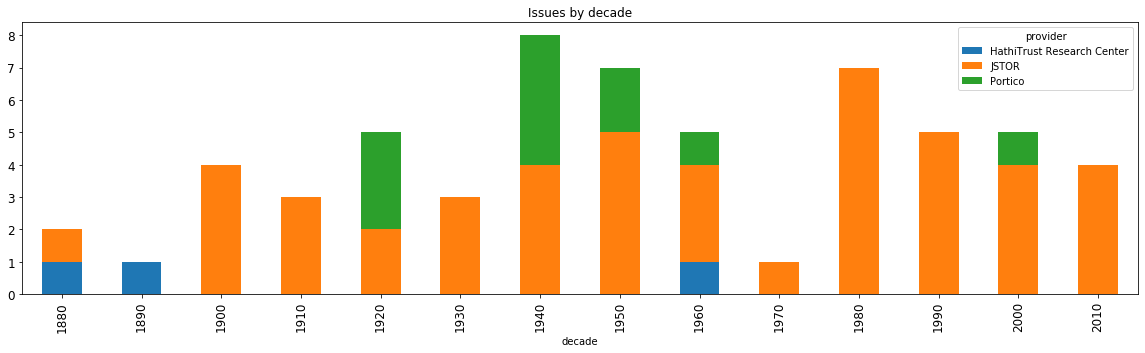

In [150]:
df.groupby(['decade', 'provider'])['id'].agg('count').unstack()\
    .plot.bar(title='Issues by decade', figsize=(20, 5), fontsize=12, stacked=True);

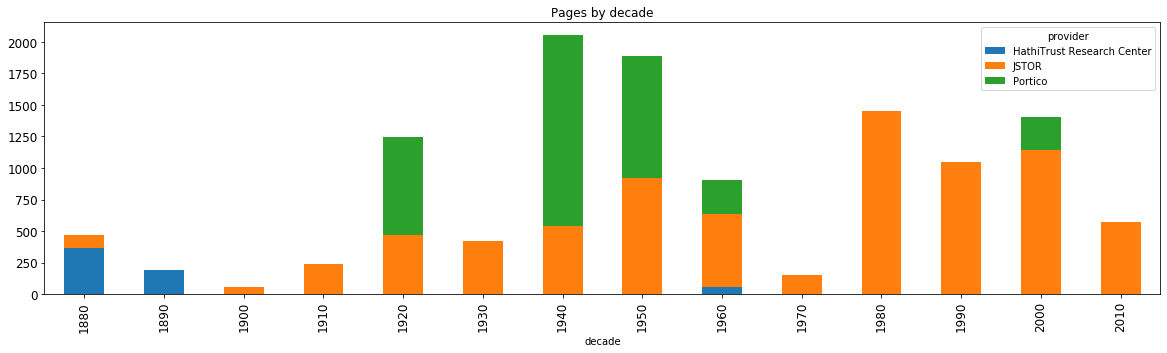

In [151]:
df.groupby(['decade', 'provider'])['pages'].agg('sum').unstack()\
    .plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12, stacked=True);